In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from langdetect import detect
from nltk.tokenize import sent_tokenize, word_tokenize 

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.stem.snowball import SnowballStemmer

In [35]:

import nltk
from nltk.tokenize import PunktSentenceTokenizer

document = 'Whether you\'re new to programming or an experienced developer, it\'s easy to learn and use Python.'
sentences = nltk.sent_tokenize(document)   
for sent in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))


[('Whether', 'IN'), ('you', 'PRP'), ("'re", 'VBP'), ('new', 'JJ'), ('to', 'TO'), ('programming', 'VBG'), ('or', 'CC'), ('an', 'DT'), ('experienced', 'JJ'), ('developer', 'NN'), (',', ','), ('it', 'PRP'), ("'s", 'VBZ'), ('easy', 'JJ'), ('to', 'TO'), ('learn', 'VB'), ('and', 'CC'), ('use', 'VB'), ('Python', 'NNP'), ('.', '.')]


In [2]:
import unidecode
def convert_unidecode(x):
    return unidecode.unidecode(x)

In [3]:
# remove ponctuation
def remove_punct1(x):
    p = ['!', '(', ')', '-', '[', ']', '{', '}', ';', ':', "'", '"', '\\', ',', '<', '>', '.', '/', '?', '@', '#', '$', '%', '^', '&', '*', '_', '~']
    return ' '.join([string for string in x.split(' ') if string not in p])

In [4]:
# remove ponctuation
def remove_punct2(x):
    import re
    return re.sub(r'[^\w]|[^\w] ', ' ', x)

In [5]:
# Define stop words to clean text (job description)
stopwords_en = set(stopwords.words('english'))

stopwords_pt = set(stopwords.words('portuguese'))

stopwords_es = set(stopwords.words('spanish'))

stopwords_de = set(stopwords.words('german'))

stopwords_nl = set(stopwords.words('dutch'))

stopwords_fr = set(stopwords.words('french'))

In [6]:
def remove_stop_words(x):
    return ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in (stopwords_en)]) if detect(x)=='en'\
    else ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in (stopwords_pt)]) if detect(x)=='pt'\
    else ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in (stopwords_es)]) if detect(x)=='es'\
    else ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in (stopwords_de)]) if detect(x)=='de'\
    else ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in (stopwords_fr)]) if detect(x)=='fr'\
    else ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in (stopwords_nl)])

In [7]:
def remove_stop_words1(x):
    stop_words_concat = list(stopwords_en)+list(stopwords_es)+list(stopwords_pt)
    return ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in stop_words_concat])

In [8]:
def stem_snowball(x):
    if detect(x) == 'pt':
        stemmer = SnowballStemmer('portuguese')
        tokens = nltk.word_tokenize(x)
        return [stemmer.stem(token) for token in tokens]
    elif detect(x) == 'en':
        stemmer = SnowballStemmer('english')
        tokens = nltk.word_tokenize(x)
        return [stemmer.stem(token) for token in tokens]
    elif detect(x) == 'es':
        stemmer = SnowballStemmer('spanish')
        tokens = nltk.word_tokenize(x)
        return [stemmer.stem(token) for token in tokens]
    elif detect(x) == 'de':
        stemmer = SnowballStemmer('german')
        tokens = nltk.word_tokenize(x)
        return [stemmer.stem(token) for token in tokens]
    elif detect(x) == 'nl':
        stemmer = SnowballStemmer('dutch')
        tokens = nltk.word_tokenize(x)
        return [stemmer.stem(token) for token in tokens]
    elif detect(x) == 'fr':
        stemmer = SnowballStemmer('french')
        tokens = nltk.word_tokenize(x)
        return [stemmer.stem(token) for token in tokens]
    else:
        return nltk.word_tokenize(x)

In [9]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [10]:
def bigrams(x):
    try:
        #Tokens = nltk.word_tokenize(x)
        output = list(nltk.bigrams(x))
        return output
    except:
        pass

In [11]:
def trigram(x):
    try:
        #Tokens = nltk.word_tokenize(x)
        output = list(nltk.trigrams(x))
        return output
    except:
        pass

In [12]:
def token(x):
    output = nltk.word_tokenize(x)
    return output

In [13]:
df = pd.read_csv('/home/inrx/Ironhack/TA/job-search/linkedin-project/linkedin_search.csv')
print (df.shape)
df.head()

(718, 12)


,title,company,company-link,post-date,applications,location,role-description,link,"experience,",type_work,function,sector_final
0,"Data Analyst - Milano, Milano",P. & P. Consulting,https://it.linkedin.com/company/programs-&-pro...,2 days ago,Be among the first 25 applicants,"Milano, IT","Ricerchiamo un Data Analyst, per attività di a...",https://www.linkedin.com/jobs/view/1605083546,Entry level,Full-time,Information Technology,"['', 'Information ', 'Technology and ', 'Servi..."
1,Data Analyst,Cromwell Property Services,https://uk.linkedin.com/company/cromwell?trk=g...,3 weeks ago,Be among the first 25 applicants,"Leicester, GB",As we embark on an exciting period of change t...,https://www.linkedin.com/jobs/view/1564171840,Entry level,Full-time,Information Technology,"['', 'Staffing and ', 'Recruiting', 'Consumer ..."
2,Data Analyst Intern,The Shortcut,https://fi.linkedin.com/company/theshortcut?tr...,5 days ago,Be among the first 25 applicants,"Helsinki, FI","Are you a bit mad, very driven, and excited ab...",https://www.linkedin.com/jobs/view/1599766365,Internship,Internship,Information Technology,"['', 'Marketing and ', 'Advertising', 'Compute..."
3,Data Analyst (Business Intelligence) (m/w/d),atene KOM GmbH,https://de.linkedin.com/company/atene-kom-gmbh...,5 days ago,Be among the first 25 applicants,"Berlin, DE",Für unser Büro-Loft in Berlin-Friedrichshain s...,https://www.linkedin.com/jobs/view/1599163575,Associate,Full-time,Information Technology,"['', 'Information ', 'Technology and ', 'Servi..."
4,Data Insight Analyst - London,Metrica Recruitment,https://www.linkedin.com/company/metrica-recru...,4 weeks ago,Be among the first 25 applicants,"London, GB",**The Company**\nA leading provider of researc...,https://www.linkedin.com/jobs/view/1603033659,Entry level,Full-time,Other,"['', 'Information ', 'Technology and ', 'Servi..."


In [14]:
df = df.drop_duplicates(keep='last')
df = df.reset_index(drop=True)
df.shape

(518, 12)

In [15]:
df = df.replace(to_replace=r'\n', value=' ', regex=True)

In [16]:
df['role-description'] = df['role-description'].apply(remove_punct1)
df['role-description'] = df['role-description'].apply(remove_punct2)

In [17]:
df['role-description'] = df['role-description'].apply(lambda x: x.lower())

In [18]:
# Clean the text according remove the stopwords according to the language of the job post
df['role_description1'] = df['role-description'].apply(remove_stop_words)

# Clean the text according remove the stopwords regardless the language of the job post
df['role_description1'] = df['role_description1'].apply(remove_stop_words1)

In [19]:
df['role-description'] = df['role-description'].apply(convert_unidecode)

In [20]:
df['role_description1'] = df['role_description1'].apply(stem_snowball)

In [21]:
df['lang'] = df['role-description'].apply(lambda x: detect(x))
set(df['lang'])

{'cy', 'de', 'en', 'es', 'fi', 'fr', 'it', 'nl', 'pl', 'pt', 'sk', 'sv'}

In [22]:
df.head()

,title,company,company-link,post-date,applications,location,role-description,link,"experience,",type_work,function,sector_final,role_description1,lang
0,"Data Analyst - Milano, Milano",P. & P. Consulting,https://it.linkedin.com/company/programs-&-pro...,2 days ago,Be among the first 25 applicants,"Milano, IT",ricerchiamo un data analyst per attivita di a...,https://www.linkedin.com/jobs/view/1605083546,Entry level,Full-time,Information Technology,"['', 'Information ', 'Technology and ', 'Servi...","[ricerchiamo, data, analyst, per, attività, di...",it
1,Data Analyst,Cromwell Property Services,https://uk.linkedin.com/company/cromwell?trk=g...,3 weeks ago,Be among the first 25 applicants,"Leicester, GB",as we embark on an exciting period of change t...,https://www.linkedin.com/jobs/view/1564171840,Entry level,Full-time,Information Technology,"['', 'Staffing and ', 'Recruiting', 'Consumer ...","[embark, excit, period, chang, throughout, bus...",en
2,Data Analyst Intern,The Shortcut,https://fi.linkedin.com/company/theshortcut?tr...,5 days ago,Be among the first 25 applicants,"Helsinki, FI",are you a bit mad very driven and excited ab...,https://www.linkedin.com/jobs/view/1599766365,Internship,Internship,Information Technology,"['', 'Marketing and ', 'Advertising', 'Compute...","[bit, mad, driven, excit, build, new, thing, l...",en
3,Data Analyst (Business Intelligence) (m/w/d),atene KOM GmbH,https://de.linkedin.com/company/atene-kom-gmbh...,5 days ago,Be among the first 25 applicants,"Berlin, DE",fur unser buro loft in berlin friedrichshain s...,https://www.linkedin.com/jobs/view/1599163575,Associate,Full-time,Information Technology,"['', 'Information ', 'Technology and ', 'Servi...","[buro, loft, berlin, friedrichshain, such, ab,...",de
4,Data Insight Analyst - London,Metrica Recruitment,https://www.linkedin.com/company/metrica-recru...,4 weeks ago,Be among the first 25 applicants,"London, GB",the company a leading provider of research...,https://www.linkedin.com/jobs/view/1603033659,Entry level,Full-time,Other,"['', 'Information ', 'Technology and ', 'Servi...","[compani, lead, provid, research, data, strate...",en


In [23]:
df['role_des_bigrams'] = df['role_description1'].apply(bigrams)

In [24]:
df['role_des_trigrams'] = df['role_description1'].apply(trigram)

In [25]:
df.head()

,title,company,company-link,post-date,applications,location,role-description,link,"experience,",type_work,function,sector_final,role_description1,lang,role_des_bigrams,role_des_trigrams
0,"Data Analyst - Milano, Milano",P. & P. Consulting,https://it.linkedin.com/company/programs-&-pro...,2 days ago,Be among the first 25 applicants,"Milano, IT",ricerchiamo un data analyst per attivita di a...,https://www.linkedin.com/jobs/view/1605083546,Entry level,Full-time,Information Technology,"['', 'Information ', 'Technology and ', 'Servi...","[ricerchiamo, data, analyst, per, attività, di...",it,"[(ricerchiamo, data), (data, analyst), (analys...","[(ricerchiamo, data, analyst), (data, analyst,..."
1,Data Analyst,Cromwell Property Services,https://uk.linkedin.com/company/cromwell?trk=g...,3 weeks ago,Be among the first 25 applicants,"Leicester, GB",as we embark on an exciting period of change t...,https://www.linkedin.com/jobs/view/1564171840,Entry level,Full-time,Information Technology,"['', 'Staffing and ', 'Recruiting', 'Consumer ...","[embark, excit, period, chang, throughout, bus...",en,"[(embark, excit), (excit, period), (period, ch...","[(embark, excit, period), (excit, period, chan..."
2,Data Analyst Intern,The Shortcut,https://fi.linkedin.com/company/theshortcut?tr...,5 days ago,Be among the first 25 applicants,"Helsinki, FI",are you a bit mad very driven and excited ab...,https://www.linkedin.com/jobs/view/1599766365,Internship,Internship,Information Technology,"['', 'Marketing and ', 'Advertising', 'Compute...","[bit, mad, driven, excit, build, new, thing, l...",en,"[(bit, mad), (mad, driven), (driven, excit), (...","[(bit, mad, driven), (mad, driven, excit), (dr..."
3,Data Analyst (Business Intelligence) (m/w/d),atene KOM GmbH,https://de.linkedin.com/company/atene-kom-gmbh...,5 days ago,Be among the first 25 applicants,"Berlin, DE",fur unser buro loft in berlin friedrichshain s...,https://www.linkedin.com/jobs/view/1599163575,Associate,Full-time,Information Technology,"['', 'Information ', 'Technology and ', 'Servi...","[buro, loft, berlin, friedrichshain, such, ab,...",de,"[(buro, loft), (loft, berlin), (berlin, friedr...","[(buro, loft, berlin), (loft, berlin, friedric..."
4,Data Insight Analyst - London,Metrica Recruitment,https://www.linkedin.com/company/metrica-recru...,4 weeks ago,Be among the first 25 applicants,"London, GB",the company a leading provider of research...,https://www.linkedin.com/jobs/view/1603033659,Entry level,Full-time,Other,"['', 'Information ', 'Technology and ', 'Servi...","[compani, lead, provid, research, data, strate...",en,"[(compani, lead), (lead, provid), (provid, res...","[(compani, lead, provid), (lead, provid, resea..."


In [26]:
trigrams = {tup:lst.count(tup) for lst in df['role_des_trigrams'] for tup in lst}

trigrams = {k: v for k, v in trigrams.items() if v > 2}

trigrams_sorted = sorted(trigrams.items(), key=lambda kv: kv[1], reverse=True)

In [27]:
bigrams = {tup:lst.count(tup) for lst in df['role_des_bigrams'] for tup in lst}

bigrams = {k: v for k, v in bigrams.items() if v > 2}

bigrams_sorted = sorted(bigrams.items(), key=lambda kv: kv[1], reverse=True)

In [29]:
tokens = {tup:lst.count(tup) for lst in df['role_description1'] for tup in lst}

tokens = {k: v for k, v in tokens.items() if v > 5}

tokens_sorted = sorted(tokens.items(), key=lambda kv: kv[1], reverse=True)

In [30]:
bigrams_sorted

[(('group', 'intern'), 15),
 (('uk', 'biobank'), 11),
 (('market', 'fundament'), 10),
 (('heineken', 'netherland'), 9),
 (('ground', 'truth'), 9),
 (('h', 'b'), 9),
 (('big', 'dat'), 8),
 (('00', 'h'), 8),
 (('bnp', 'pariba'), 7),
 (('gobiern', 'dat'), 7),
 (('risk', 'data'), 7),
 (('nation', 'grid'), 7),
 (('porsch', 'consult'), 7),
 (('element', 'prototyp'), 7),
 (('transit', 'data'), 6),
 (('civil', 'servic'), 6),
 (('financi', 'crime'), 6),
 (('jam', 'citi'), 6),
 (('digit', 'social'), 6),
 (('small', 'busi'), 6),
 (('financi', 'well'), 6),
 (('stress', 'test'), 6),
 (('back', 'market'), 6),
 (('leadership', 'partner'), 6),
 (('goldman', 'sach'), 6),
 (('data', 'analyst'), 5),
 (('social', 'media'), 5),
 (('business', 'data'), 5),
 (('lead', 'instructor'), 5),
 (('mobil', 'game'), 5),
 (('visa', 'bank'), 5),
 (('azur', 'data'), 5),
 (('intelligenc', 'analyst'), 5),
 (('r', 'solut'), 5),
 (('virgin', 'media'), 5),
 (('custom', 'dat'), 5),
 (('mobilcom', 'debitel'), 5),
 (('market', 

In [31]:
trigrams_sorted

[(('group', 'intern', 'audit'), 14),
 (('data', 'analyt', 'offic'), 8),
 (('associ', 'data', 'analyst'), 8),
 (('credit', 'risk', 'data'), 7),
 (('risk', 'data', 'analyst'), 7),
 (('business', 'intelligenc', 'analyst'), 5),
 (('business', 'data', 'business'), 5),
 (('data', 'business', 'intelligenc'), 5),
 (('market', 'fundament', 'team'), 5),
 (('porsch', 'consult', 'inc'), 5),
 (('salesforc', 'salesforc', 'org'), 4),
 (('bi', 'power', 'app'), 4),
 (('career', 'nationalarch', 'gov'), 4),
 (('digit', 'social', 'media'), 4),
 (('sql', 'data', 'analyst'), 4),
 (('digit', 'platform', 'servic'), 4),
 (('custom', 'dat', 'analyst'), 4),
 (('aalbert', 'surfac', 'treatment'), 4),
 (('customer', 'data', 'analyst'), 4),
 (('high', 'qualiti', 'servic'), 4),
 (('anchor', 'hanov', 'group'), 3),
 (('data', 'govern', 'refer'), 3),
 (('govern', 'refer', 'master'), 3),
 (('refer', 'master', 'data'), 3),
 (('master', 'data', 'busi'), 3),
 (('heineken', 'netherland', 'commerc'), 3),
 (('heineken', 'nethe

In [32]:
tokens_sorted

[('attest', 22),
 ('och', 19),
 ('di', 17),
 ('game', 17),
 ('manag', 16),
 ('yn', 16),
 ('aso', 12),
 ('fitch', 12),
 ('att', 12),
 ('blackrock', 12),
 ('bbc', 12),
 ('rocco', 12),
 ('var', 12),
 ('izettl', 12),
 ('criteo', 11),
 ('marsh', 11),
 ('biobank', 11),
 ('virgin', 11),
 ('nous', 11),
 ('member', 10),
 ('client', 10),
 ('leadership', 10),
 ('ubisoft', 10),
 ('metapack', 10),
 ('bloomberg', 10),
 ('roger', 10),
 ('gobiern', 10),
 ('rsquo', 10),
 ('et', 10),
 ('porsch', 10),
 ('quizlet', 10),
 ('airbus', 10),
 ('nexthink', 10),
 ('dati', 9),
 ('h', 9),
 ('trivago', 9),
 ('vmware', 9),
 ('heuritech', 9),
 ('customer', 9),
 ('atos', 9),
 ('data', 8),
 ('develop', 8),
 ('bof', 8),
 ('mail', 8),
 ('savil', 8),
 ('jeux', 8),
 ('hungari', 8),
 ('rabobank', 8),
 ('stfs', 8),
 ('stda', 8),
 ('aalbert', 8),
 ('eich', 8),
 ('skello', 8),
 ('beazley', 8),
 ('aviva', 8),
 ('busi', 7),
 ('strategi', 7),
 ('procedur', 7),
 ('guru', 7),
 ('stress', 7),
 ('invest', 7),
 ('bnp', 7),
 ('pariba',

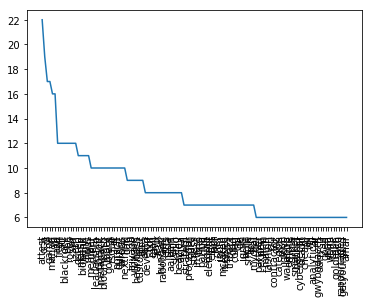

In [34]:
tokens_x =list(zip(*tokens_sorted))[0]
tokens_y =list(zip(*tokens_sorted))[1]

import matplotlib.pyplot as plt
#%matplotlib notebook
plt.plot(tokens_x, tokens_y);
plt.xticks(rotation=90)
plt.show()
#plt.ylim(5,15);